In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')
train.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
#On garde en copie les datasets originelles en memoire au cas ou on a besoin plus tard
train_original = train.copy()
test_original = test.copy()

## Exploration des données 
Dans cette partie nous regarderons nos données, matrice de correlation, distributions des classes et études des variables de sol 

In [4]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2909,28,18,182,58,1350,210,197,117,2160,...,0,0,0,0,0,0,0,0,0,2
1,2757,334,30,212,83,1384,137,184,177,1570,...,0,0,0,0,0,0,0,0,0,2
2,3283,248,4,150,15,5601,211,243,170,892,...,0,0,0,0,0,0,1,0,0,1
3,3019,330,14,541,-101,1811,186,222,175,2154,...,0,0,0,0,0,0,0,0,0,2
4,3039,340,20,474,74,3407,175,207,169,1879,...,0,0,0,0,0,0,0,1,0,1


On peut commencer a remarquer que nous disposons de beaucoup de variables binaires pour les types de sol que nous pourrons chercher a reduire

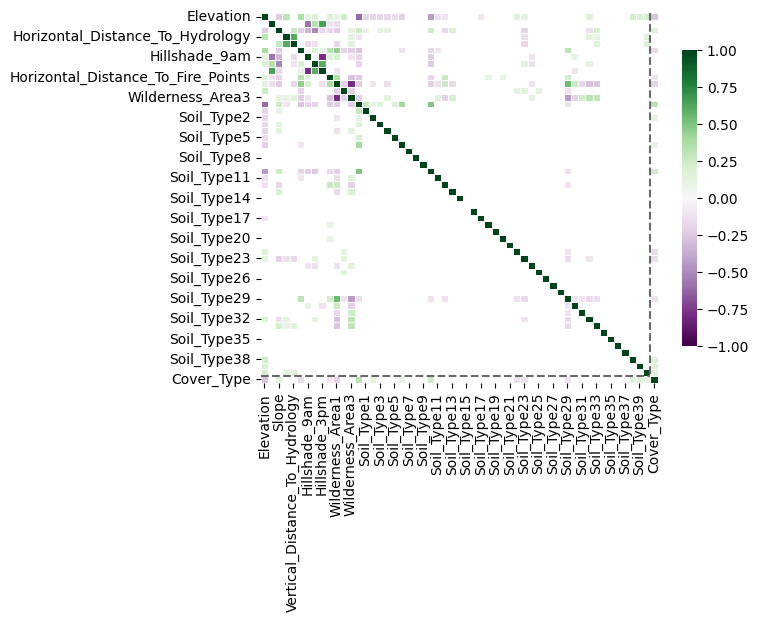

In [4]:

df = train.copy()
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

mask = np.abs(corr_matrix) < 0.1  #
palette = 'PRGn'

fig, ax = plt.subplots(1, 1)
sns.heatmap(corr_matrix, mask=mask, annot=False, vmin=-1, vmax=1, cmap=palette, ax=ax, 
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor="white")

nvarexp = df.shape[1] - 1
ax.plot([0, nvarexp], [nvarexp, nvarexp], linestyle='--', color='dimgray')
ax.plot([nvarexp, nvarexp], [0, nvarexp], linestyle='--', color='dimgray')

plt.show()


### etude des variables binaires

Les variables ne semblent pas au premier abord specialement très correle entre elle, on commence donc notre étude sans en enlever. On peut également remarquer que pour la pluspart 
la variable objectif n'est pas correlé aux autres. Cela ne veut pas dire qu'il n'y a pas de lien mais qu'elles ne sont pas relié de maniere lineaire, cela nous indique que des 
modeles utilisant des arbres de decisions seraient plus aptes a capter ce genre de relations que des modeles lineaires comme la regression logisitque. 

/tmp/ipykernel_3328/2449047786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.index, y=count_data.values, palette="viridis")


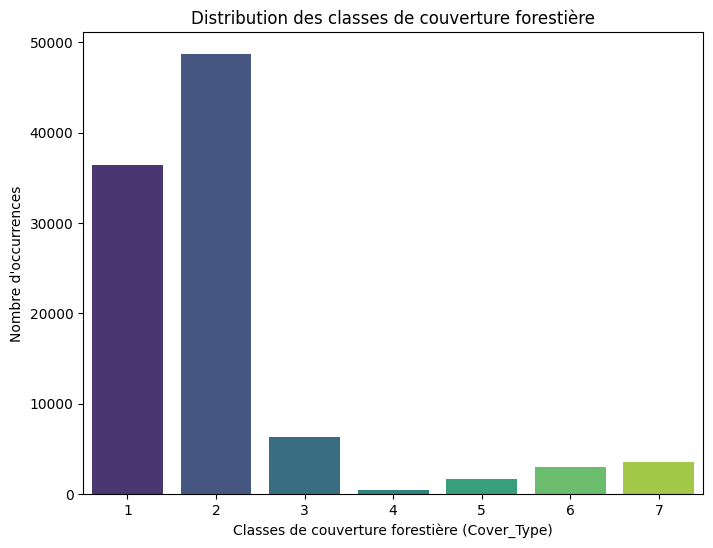

In [5]:

count_data = df['Cover_Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=count_data.index, y=count_data.values, palette="viridis")
plt.xlabel("Classes de couverture forestière (Cover_Type)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des classes de couverture forestière")
plt.show()


Certaines classes sont sous representé par rapport aux autres, classe 4,5,6 et 7,3 par rapport a 1 et 2 on pourra penser a faire de l'over fitting ou de l'underfitting

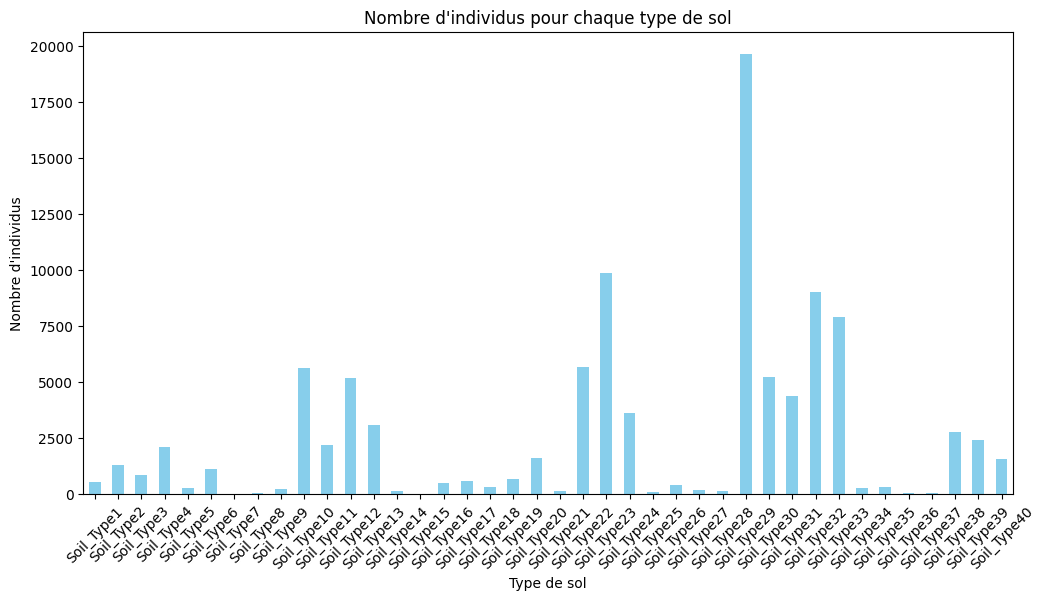

In [6]:
soil_columns = [col for col in df.columns if 'Soil_Type' in col]

# Calculer le nombre d'individus pour chaque type de sol
soil_counts = df[soil_columns].sum()

# Créer un histogramme
plt.figure(figsize=(12, 6))
soil_counts.plot(kind='bar', color='skyblue')
plt.title("Nombre d'individus pour chaque type de sol")
plt.xlabel("Type de sol")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)
plt.show()

On peut voir que certaines variable soil type on très peu d'individu, ce qui peut poser probleme si il y a une faible diversité de cover type parmis ceux la. 

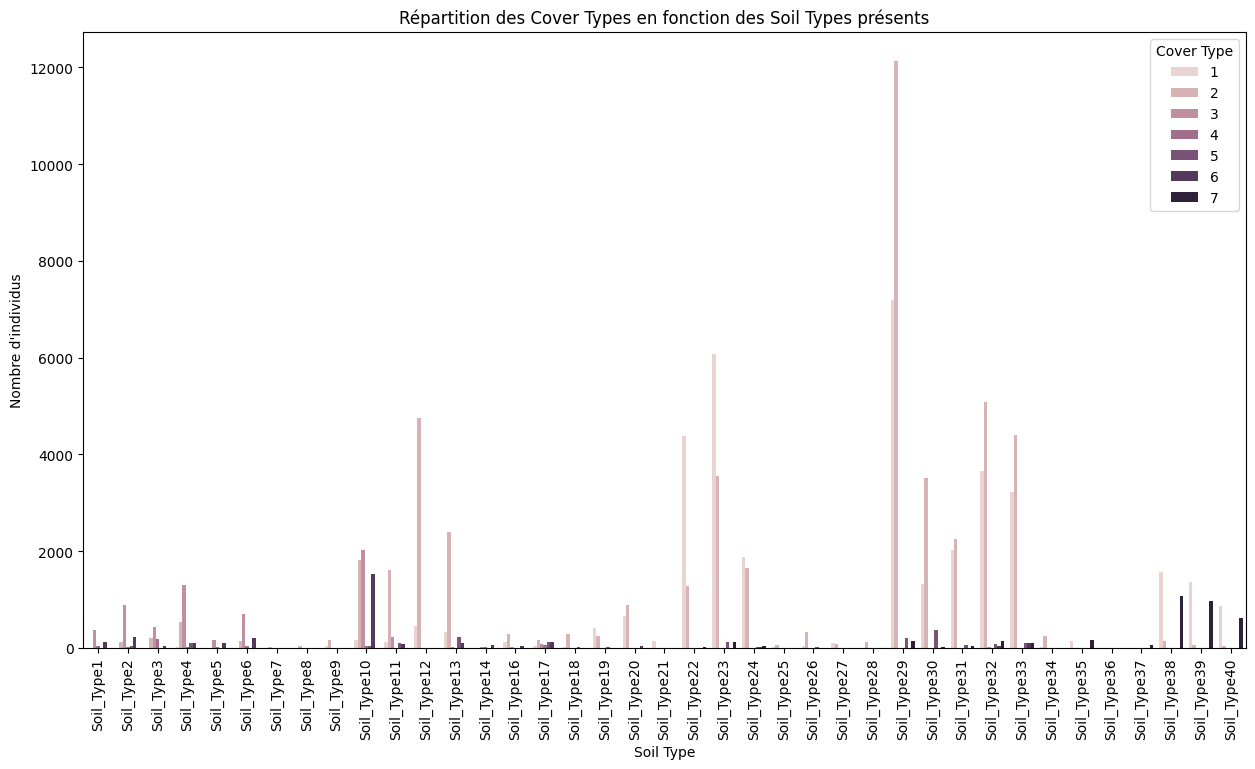

In [5]:
df_melted = df.melt(id_vars='Cover_Type', value_vars=[col for col in df.columns if 'Soil_Type' in col],
                    var_name='Soil_Type', value_name='Presence')

df_melted = df_melted[df_melted['Presence'] == 1]

# Visualisation
plt.figure(figsize=(15, 8))
sns.countplot(data=df_melted, x='Soil_Type', hue='Cover_Type')
plt.title("Répartition des Cover Types en fonction des Soil Types présents")
plt.xlabel("Soil Type")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=90)
plt.legend(title="Cover Type")
plt.show()


Certaines variable de soil on très peu de diversité, on observe également des pics d'individu pour certains type de sol de meme cover type. On pourrait potentiellement penser a 
supprimer les variables avec peu d'individu

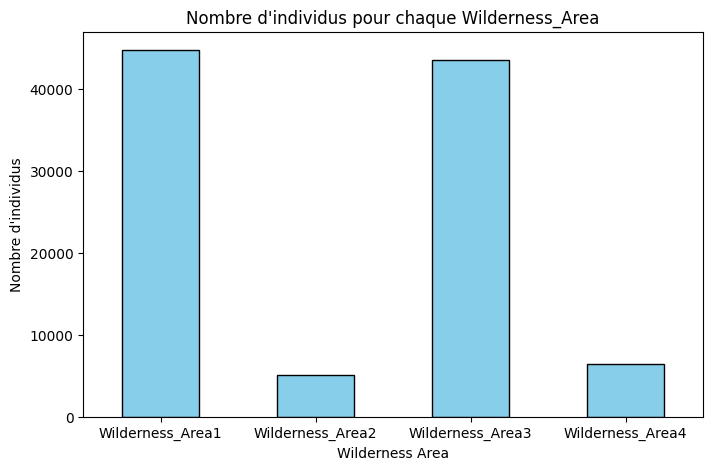

In [8]:
# Compter le nombre d'individus pour chaque variable Wilderness_Area
wilderness_counts = df[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum()

# Créer un histogramme
plt.figure(figsize=(8, 5))
wilderness_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'individus pour chaque Wilderness_Area")
plt.xlabel("Wilderness Area")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=0)
plt.show()

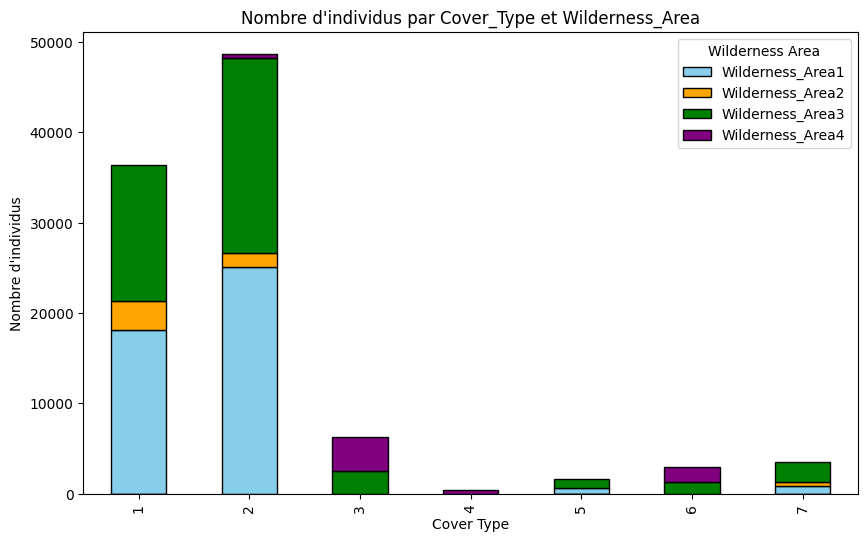

In [9]:
# Compter le nombre d'individus par Cover_Type et Wilderness_Area
wilderness_cover_counts = df.groupby('Cover_Type')[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum()

# Graphique en barres empilées
wilderness_cover_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')
plt.title("Nombre d'individus par Cover_Type et Wilderness_Area")
plt.xlabel("Cover Type")
plt.ylabel("Nombre d'individus")
plt.legend(title="Wilderness Area", labels=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
plt.show()


### etudes des variables continues 

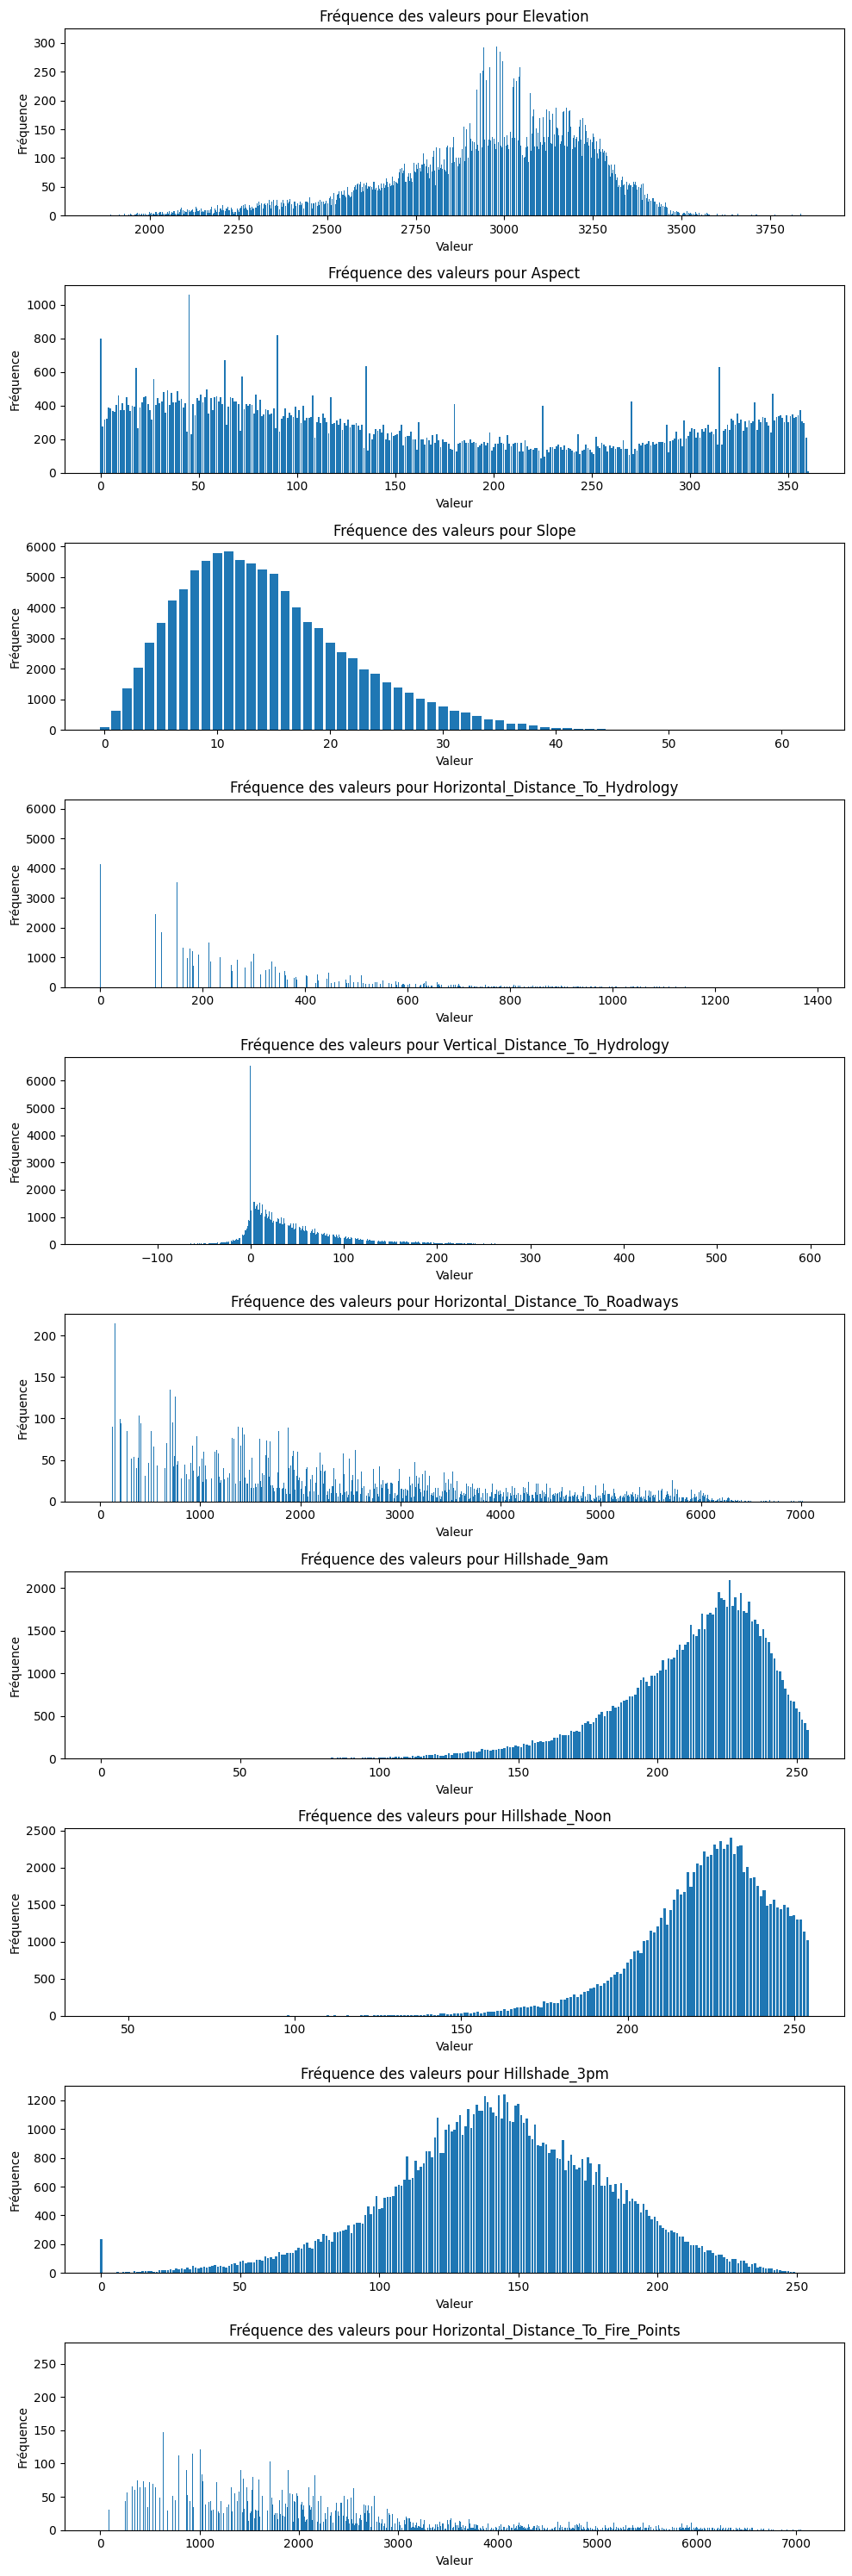

In [10]:
# Liste des variables continues
continuous_vars = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                   'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                   'Horizontal_Distance_To_Fire_Points']

# Création de sous-graphiques avec une figure pour chaque variable continue
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(10, 30), tight_layout=True)

# Boucle sur chaque variable pour générer un graphique de fréquence
for i, var in enumerate(continuous_vars):
    value_counts = df[var].value_counts().sort_index()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Fréquence des valeurs pour {var}')
    axes[i].set_xlabel('Valeur')
    axes[i].set_ylabel('Fréquence')

plt.show()


## Modification des données 
Dans cette partie nous proposerons plusieurs modifications sur le dataframe initiale, rajout de variable, enlever certaines variables, overfitting et underfitting. 

In [6]:
df_change = df.copy()
# On rajoute le cos et sin pour les variables qui s'expriment en degré, on rajoute elevation relative car c'est une va qui peut prendre de grande valeurs,
#Nous avons également tester le fait de mettre au carré certaines va de distances pour augmenter leur importance et au contraire de passer au log. 

df_change['Elevation_Relative'] = df_change['Elevation'] - df_change['Elevation'].mean()
df_change['Elevation_Standardized'] = (df_change['Elevation'] - df_change['Elevation'].mean()) / df_change['Elevation'].std()
df_change['Horizontal_Distance_To_Roadways_Standardized'] =  (df_change['Horizontal_Distance_To_Roadways'] - df_change['Horizontal_Distance_To_Roadways'].mean()) / df_change['Horizontal_Distance_To_Roadways'].std()
df_change['Horizontal_Distance_To_Fire_Points_Standardized'] = (df_change['Horizontal_Distance_To_Fire_Points'] - df_change['Horizontal_Distance_To_Fire_Points'].mean()) / df_change['Horizontal_Distance_To_Fire_Points'].std()

df_change['Aspect_sin'] = np.sin(np.radians(df_change['Aspect']))
df_change['Aspect_cos'] = np.cos(np.radians(df_change['Aspect']))

df_change['Slope_sin'] = np.sin(np.radians(df_change['Slope']))
df_change['Slope_cos'] = np.cos(np.radians(df_change['Slope']))

df_change['Horizontal_Distance_To_Hydrology_2'] = df_change['Horizontal_Distance_To_Hydrology']**2
df_change['Vertical_Distance_To_Hydrology_2'] = df_change['Vertical_Distance_To_Hydrology']**2




In [7]:
# Création d'une copie de df_test pour effectuer les transformations
df_test_change = test.copy()

# Ajout de la colonne 'Elevation_Relative'
df_test_change['Elevation_Relative'] = df_test_change['Elevation'] - df_test_change['Elevation'].mean()

# Ajout de la colonne 'Elevation_Standardized' (standardisation de l'altitude)
df_test_change['Elevation_Standardized'] = (df_test_change['Elevation'] - df_test_change['Elevation'].mean()) / df_test_change['Elevation'].std()

# Standardisation des distances horizontales par rapport aux routes et aux points de feu
df_test_change['Horizontal_Distance_To_Roadways_Standardized'] = (df_test_change['Horizontal_Distance_To_Roadways'] - df_test_change['Horizontal_Distance_To_Roadways'].mean()) / df_test_change['Horizontal_Distance_To_Roadways'].std()
df_test_change['Horizontal_Distance_To_Fire_Points_Standardized'] = (df_test_change['Horizontal_Distance_To_Fire_Points'] - df_test_change['Horizontal_Distance_To_Fire_Points'].mean()) / df_test_change['Horizontal_Distance_To_Fire_Points'].std()

# Ajout des composants sinusoïdaux et cosinus de l'orientation et de la pente
df_test_change['Aspect_sin'] = np.sin(np.radians(df_test_change['Aspect']))
df_test_change['Aspect_cos'] = np.cos(np.radians(df_test_change['Aspect']))
df_test_change['Slope_sin'] = np.sin(np.radians(df_test_change['Slope']))
df_test_change['Slope_cos'] = np.cos(np.radians(df_test_change['Slope']))

# Ajout des carrés des distances horizontales et verticales à l'hydrographie
df_test_change['Horizontal_Distance_To_Hydrology_2'] = df_test_change['Horizontal_Distance_To_Hydrology'] ** 2
df_test_change['Vertical_Distance_To_Hydrology_2'] = df_test_change['Vertical_Distance_To_Hydrology'] ** 2


In [ ]:
#'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points' 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology

In [18]:
#df_change.drop(columns=['Elevation',  'Aspect', 'Slope','Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points' ,'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], inplace=True)


In [14]:
#df_test_change.drop(columns=['Elevation',  'Aspect', 'Slope','Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points' ,'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], inplace=True)


In [22]:
soil_counts = df_melted['Soil_Type'].value_counts()

# Filtrer les Soil_Type avec moins de 100 occurrences
rare_soil_types = soil_counts[soil_counts < 200].index.tolist()
df_change_2 = df_change.drop(columns=rare_soil_types)
df_test_change_2 = df_test_change.drop(columns =rare_soil_types)

In [23]:
df_change_2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Elevation_Relative,Elevation_Standardized,Horizontal_Distance_To_Roadways_Standardized,Horizontal_Distance_To_Fire_Points_Standardized,Aspect_sin,Aspect_cos,Slope_sin,Slope_cos,Horizontal_Distance_To_Hydrology_2,Vertical_Distance_To_Hydrology_2
0,2909,28,18,182,58,1350,210,197,117,2160,...,-50.21515,-0.178808,-0.641052,0.138546,0.469472,0.882948,0.309017,0.951057,33124,3364
1,2757,334,30,212,83,1384,137,184,177,1570,...,-202.21515,-0.720055,-0.619264,-0.306762,-0.438371,0.898794,0.500000,0.866025,44944,6889
2,3283,248,4,150,15,5601,211,243,170,892,...,323.78485,1.152945,2.083076,-0.818489,-0.927184,-0.374607,0.069756,0.997564,22500,225
3,3019,330,14,541,-101,1811,186,222,175,2154,...,59.78485,0.212884,-0.345634,0.134018,-0.500000,0.866025,0.241922,0.970296,292681,10201
4,3039,340,20,474,74,3407,175,207,169,1879,...,79.78485,0.284101,0.677116,-0.073541,-0.342020,0.939693,0.342020,0.939693,224676,5476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2521,187,17,30,1,1099,220,250,158,1565,...,-438.21515,-1.560413,-0.801898,-0.310536,-0.121869,-0.992546,0.292372,0.956305,900,1
99996,2891,341,16,30,9,3774,186,215,167,2718,...,-68.21515,-0.242903,0.912297,0.559702,-0.325568,0.945519,0.275637,0.961262,900,81
99997,2563,129,9,134,18,569,236,235,129,1293,...,-396.21515,-1.410858,-1.141533,-0.515830,0.777146,-0.629320,0.156434,0.987688,17956,324
99998,3322,238,14,153,32,2773,195,251,192,841,...,362.78485,1.291818,0.270836,-0.856982,-0.848048,-0.529919,0.241922,0.970296,23409,1024


In [30]:
df_test_change = df_test_change.drop(columns =rare_soil_types)

In [35]:
continuous_vars = ['Elevation_Relative','Elevation_Standardized','Aspect_sin','Aspect_cos','Slope_sin','Slope_cos','Horizontal_Distance_To_Roadways_2','Horizontal_Distance_To_Fire_Points_2','Horizontal_Distance_To_Hydrology_2','Vertical_Distance_To_Hydrology_2']

# Création de sous-graphiques avec une figure pour chaque variable continue
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(10, 30), tight_layout=True)

# Boucle sur chaque variable pour générer un graphique de fréquence
for i, var in enumerate(continuous_vars):
    value_counts = df_change[var].sort_index()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Fréquence des valeurs pour {var}')
    axes[i].set_xlabel('Valeur')
    axes[i].set_ylabel('Fréquence')

plt.show()

In [8]:
#tentative de regrouper les types de sol 
 #Fonction pour regrouper les types de sol en groupes
def regroup_soil_types(row):
    soil_groups = {
        'Affleurement_rocheux': 0,
        'Famille_Leighcan': 0,
        'Pierreux_Caillouteux': 0,
        'Complexes_Cry': 0,
        'Sols_hydriques_humides': 0,
        'Autres': 0
    }

    # Définir les règles pour chaque groupe
    if row['Soil_Type1'] == 1 or row['Soil_Type3'] == 1 or row['Soil_Type4'] == 1 or row['Soil_Type5'] == 1 or row['Soil_Type6'] == 1 or row['Soil_Type10'] == 1 or row['Soil_Type11'] == 1 or row['Soil_Type13'] == 1 or row['Soil_Type27'] == 1 or row['Soil_Type28'] == 1 or row['Soil_Type32'] == 1 or row['Soil_Type33'] == 1 or row['Soil_Type37'] == 1:
        soil_groups['Affleurement_rocheux'] = 1

    if row['Soil_Type22'] == 1 or row['Soil_Type23'] == 1 or row['Soil_Type24'] == 1 or row['Soil_Type25'] == 1 or row['Soil_Type27'] == 1 or row['Soil_Type29'] == 1 or row['Soil_Type31'] == 1 or row['Soil_Type33'] == 1:
        soil_groups['Famille_Leighcan'] = 1

    if row['Soil_Type9'] == 1 or row['Soil_Type22'] == 1 or row['Soil_Type23'] == 1 or row['Soil_Type24'] == 1 or row['Soil_Type25'] == 1 or row['Soil_Type27'] == 1 or row['Soil_Type28'] == 1 or row['Soil_Type29'] == 1 or row['Soil_Type30'] == 1 or row['Soil_Type31'] == 1 or row['Soil_Type32'] == 1 or row['Soil_Type36'] == 1 or row['Soil_Type37'] == 1 or row['Soil_Type38'] == 1 or row['Soil_Type39'] == 1:
        soil_groups['Pierreux_Caillouteux'] = 1

    if row['Soil_Type16'] == 1 or row['Soil_Type19'] == 1 or row['Soil_Type20'] == 1 or row['Soil_Type34'] == 1 or row['Soil_Type35'] == 1 or row['Soil_Type37'] == 1 or row['Soil_Type39'] == 1:
        soil_groups['Complexes_Cry'] = 1

    if row['Soil_Type6'] == 1 or row['Soil_Type14'] == 1 or row['Soil_Type19'] == 1 or row['Soil_Type20'] == 1 or row['Soil_Type21'] == 1:
        soil_groups['Sols_hydriques_humides'] = 1


    return pd.Series(soil_groups)

# Appliquer la fonction à chaque ligne du dataframe pour créer les nouvelles colonnes
df_new = df_change.copy()
df_new_ = df_new.apply(regroup_soil_types, axis=1)

# Ajouter ces nouvelles colonnes au dataframe original
df_change_2 = pd.concat([df_new, df_new_], axis=1)



In [13]:
df_test_new = df_test_change.copy()
df_test_new_ = df_test_new.apply(regroup_soil_types,axis=1)
df_test_change_2 = pd.concat([df_test_new,df_test_new_],axis=1)

In [14]:
#on enleve les variables peu performante pour le dernier modele xgboost 
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'Slope_sin',
    'Vertical_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology_2',
    'Aspect',
    'Soil_Type36',
    'Hillshade_3pm',
    'Slope',
    'Aspect_sin',
    'Slope_cos',
    'Soil_Type8',
    'Soil_Type7',
    'Soil_Type15',
    'Autres'
]

# Suppression des colonnes du DataFrame
#df_change_2 = df_change_2.drop(columns=colonnes_a_supprimer)
df_test_change_2 = df_test_change_2.drop(columns=colonnes_a_supprimer)

In [15]:
df_test_change_2

,row_ID,Elevation,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Elevation_Standardized,Horizontal_Distance_To_Roadways_Standardized,Horizontal_Distance_To_Fire_Points_Standardized,Aspect_cos,Horizontal_Distance_To_Hydrology_2,Affleurement_rocheux,Famille_Leighcan,Pierreux_Caillouteux,Complexes_Cry,Sols_hydriques_humides
0,0,2767,210,1190,234,204,2251,0,0,1,...,-0.687601,-0.744133,0.203851,0.406737,44100,0,1,1,0,0
1,1,2724,60,1350,236,240,2514,0,0,1,...,-0.841278,-0.641503,0.402485,-0.939693,3600,0,0,0,0,0
2,2,2360,127,1377,227,226,339,0,0,0,...,-2.142168,-0.624184,-1.240211,0.422618,16129,1,0,0,0,1
3,3,2995,285,5125,221,231,5706,1,0,0,...,0.127242,1.779924,2.813282,0.707107,81225,0,0,0,0,0
4,4,2400,150,342,253,196,811,0,0,1,...,-1.999213,-1.288072,-0.883727,-0.275637,22500,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481007,481007,3185,162,3695,235,240,1749,0,0,1,...,0.806279,0.862668,-0.175291,-0.891007,26244,1,0,1,0,0
481008,481008,3158,170,691,197,254,4986,0,1,0,...,0.709784,-1.064211,2.269493,-0.848048,28900,0,1,1,0,0
481009,481009,3125,912,1050,182,195,1671,0,0,1,...,0.591846,-0.833935,-0.234201,0.999391,831744,1,1,0,0,0
481010,481010,2201,67,685,132,193,1592,0,0,0,...,-2.710414,-1.068059,-0.293867,0.809017,4489,1,0,0,0,0


In [12]:
test

,row_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,2767,66,17,210,18,1190,234,204,96,...,1,0,0,0,0,0,0,0,0,0
1,1,2724,160,19,60,4,1350,236,240,127,...,0,0,0,0,0,0,0,0,0,0
2,2,2360,65,7,127,21,1377,227,226,134,...,0,0,0,0,0,0,0,0,0,0
3,3,2995,45,4,285,30,5125,221,231,146,...,0,0,0,0,0,0,0,0,0,0
4,4,2400,106,27,150,63,342,253,196,51,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481007,481007,3185,153,13,162,25,3695,235,240,134,...,0,1,0,0,0,0,0,0,0,0
481008,481008,3158,212,21,170,24,691,197,254,186,...,0,0,0,0,0,0,0,0,0,0
481009,481009,3125,358,22,912,358,1050,182,195,147,...,0,0,1,0,0,0,0,0,0,0
481010,481010,2201,324,30,67,50,685,132,193,193,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_change_2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Slope_sin,Slope_cos,Horizontal_Distance_To_Hydrology_2,Vertical_Distance_To_Hydrology_2,Affleurement_rocheux,Famille_Leighcan,Pierreux_Caillouteux,Complexes_Cry,Sols_hydriques_humides,Autres
0,2909,28,18,182,58,1350,210,197,117,2160,...,0.309017,0.951057,33124,3364,0,1,1,0,0,0
1,2757,334,30,212,83,1384,137,184,177,1570,...,0.500000,0.866025,44944,6889,0,1,1,0,0,0
2,3283,248,4,150,15,5601,211,243,170,892,...,0.069756,0.997564,22500,225,0,0,1,0,0,0
3,3019,330,14,541,-101,1811,186,222,175,2154,...,0.241922,0.970296,292681,10201,0,1,1,0,0,0
4,3039,340,20,474,74,3407,175,207,169,1879,...,0.342020,0.939693,224676,5476,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2521,187,17,30,1,1099,220,250,158,1565,...,0.292372,0.956305,900,1,1,0,0,0,0,0
99996,2891,341,16,30,9,3774,186,215,167,2718,...,0.275637,0.961262,900,81,0,1,1,0,0,0
99997,2563,129,9,134,18,569,236,235,129,1293,...,0.156434,0.987688,17956,324,0,0,1,0,0,0
99998,3322,238,14,153,32,2773,195,251,192,841,...,0.241922,0.970296,23409,1024,0,1,1,0,0,0


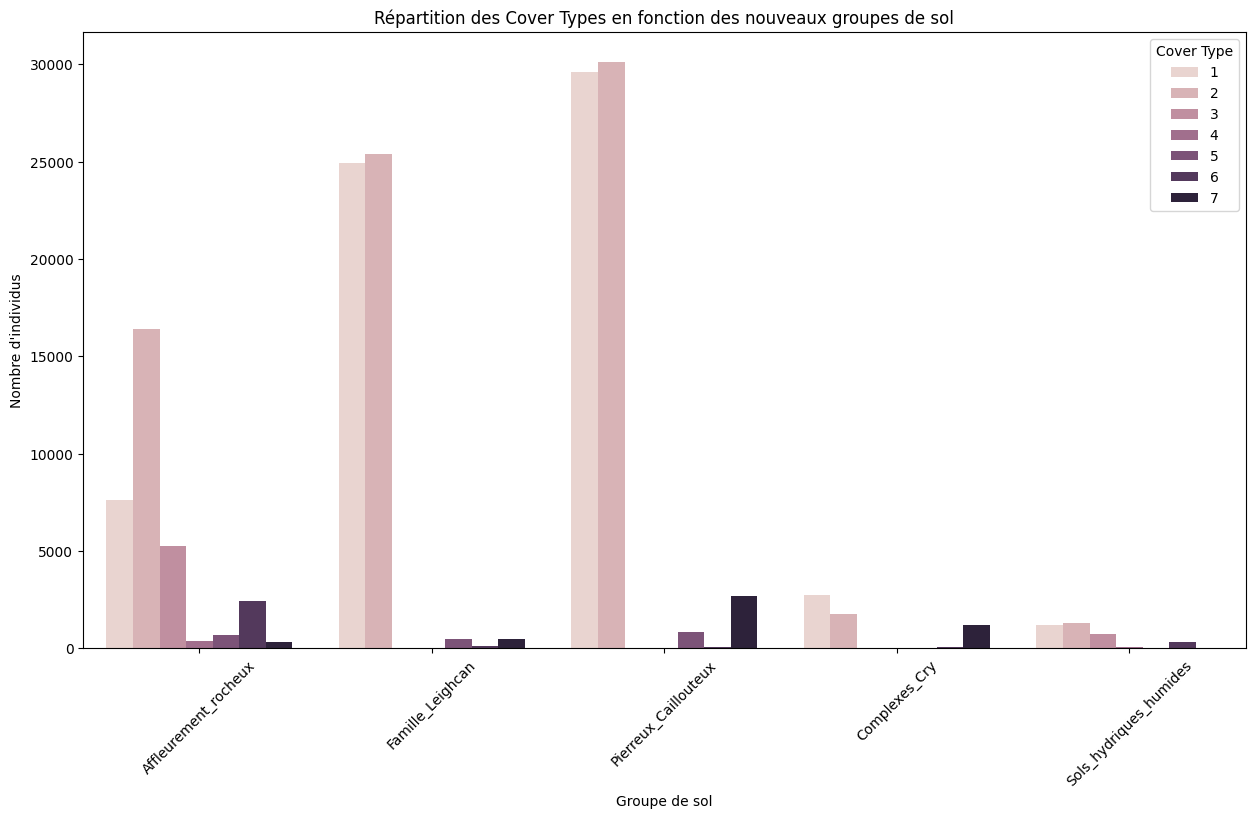

In [30]:
gdf_melted = df_change_2.melt(id_vars='Cover_Type', value_vars=['Affleurement_rocheux', 'Famille_Leighcan', 'Pierreux_Caillouteux', 'Complexes_Cry', 'Sols_hydriques_humides'],
                      var_name='Soil_Group', value_name='Presence')

# Garder uniquement les lignes où les groupes de sol sont présents (valeur = 1)
gdf_melted = gdf_melted[gdf_melted['Presence'] == 1]

gdf_melted
plt.figure(figsize=(15, 8))
sns.countplot(data=gdf_melted, x='Soil_Group', hue='Cover_Type')
plt.title("Répartition des Cover Types en fonction des nouveaux groupes de sol")
plt.xlabel("Groupe de sol")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)
plt.legend(title="Cover Type")
plt.show()

In [10]:
#on retire les types de soil avec peu d'individu
# Compter les occurrences de chaque Soil_Type
soil_counts = df_melted['Soil_Type'].value_counts()

# Filtrer les Soil_Type avec moins de 100 occurrences
rare_soil_types = soil_counts[soil_counts < 200].index.tolist()
df_change_2 = df_change_2.drop(columns=rare_soil_types)

NameError: name 'df_change_2' is not defined

In [28]:
df_change_2 = df_change.copy()


In [29]:
df_change_2

,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,...,Cover_Type,Elevation_Standardized,Horizontal_Distance_To_Roadways_Standardized,Horizontal_Distance_To_Fire_Points_Standardized,Aspect_sin,Aspect_cos,Slope_sin,Slope_cos,Horizontal_Distance_To_Hydrology_2,Vertical_Distance_To_Hydrology_2
0,210,197,117,0,0,1,0,0,0,0,...,2,-0.178808,-0.641052,0.138546,0.469472,0.882948,0.309017,0.951057,33124,3364
1,137,184,177,0,0,1,0,0,0,0,...,2,-0.720055,-0.619264,-0.306762,-0.438371,0.898794,0.500000,0.866025,44944,6889
2,211,243,170,1,0,0,0,0,0,0,...,1,1.152945,2.083076,-0.818489,-0.927184,-0.374607,0.069756,0.997564,22500,225
3,186,222,175,0,0,1,0,0,0,0,...,2,0.212884,-0.345634,0.134018,-0.500000,0.866025,0.241922,0.970296,292681,10201
4,175,207,169,0,0,1,0,0,0,0,...,1,0.284101,0.677116,-0.073541,-0.342020,0.939693,0.342020,0.939693,224676,5476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,220,250,158,0,0,1,0,0,0,0,...,6,-1.560413,-0.801898,-0.310536,-0.121869,-0.992546,0.292372,0.956305,900,1
99996,186,215,167,1,0,0,0,0,0,0,...,2,-0.242903,0.912297,0.559702,-0.325568,0.945519,0.275637,0.961262,900,81
99997,236,235,129,1,0,0,0,0,0,0,...,2,-1.410858,-1.141533,-0.515830,0.777146,-0.629320,0.156434,0.987688,17956,324
99998,195,251,192,0,0,1,0,0,0,0,...,1,1.291818,0.270836,-0.856982,-0.848048,-0.529919,0.241922,0.970296,23409,1024


In [30]:
df_change_2 = df_change.copy()
# Liste des variables à retirer
variables_a_retirer = [
    'Soil_Type1', 'Aspect_cos', 'Hillshade_9am', 'Hillshade_Noon', 
    'Vertical_Distance_To_Hydrology_2', 'Slope_sin', 'Hillshade_3pm', 
    'Aspect_sin', 'Slope_cos', 'Soil_Type15'
]

# Suppression des variables du DataFrame
df_change_2.drop(columns = variables_a_retirer)


,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,...,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Elevation_Standardized,Horizontal_Distance_To_Roadways_Standardized,Horizontal_Distance_To_Fire_Points_Standardized,Horizontal_Distance_To_Hydrology_2
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,-0.178808,-0.641052,0.138546,33124
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,-0.720055,-0.619264,-0.306762,44944
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1.152945,2.083076,-0.818489,22500
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0.212884,-0.345634,0.134018,292681
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.284101,0.677116,-0.073541,224676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,6,-1.560413,-0.801898,-0.310536,900
99996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,-0.242903,0.912297,0.559702,900
99997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,-1.410858,-1.141533,-0.515830,17956
99998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1.291818,0.270836,-0.856982,23409


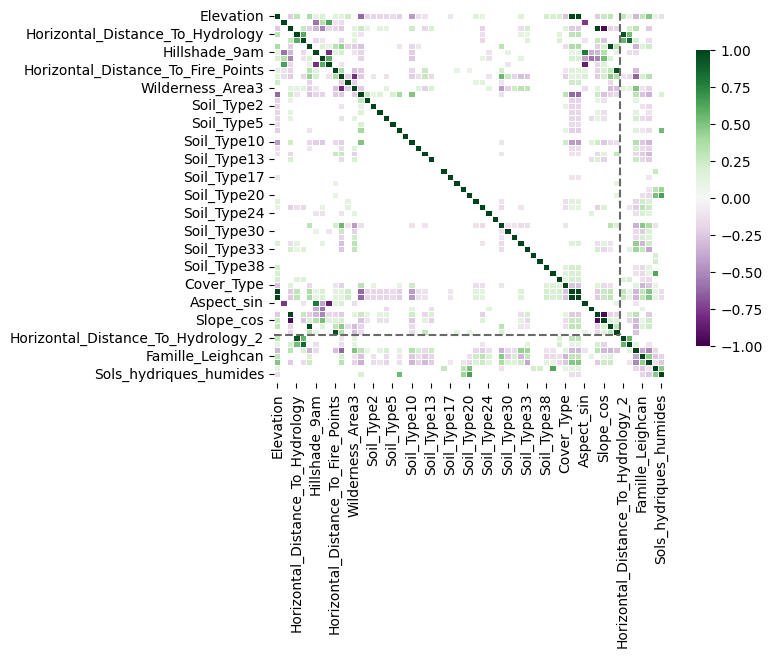

In [24]:
corr_matrix = df_change_2.corr()

mask = np.abs(corr_matrix) < 0.1  

# Choix de la palette de couleurs
palette = 'PRGn'

fig, ax = plt.subplots(1, 1)
sns.heatmap(corr_matrix, mask=mask, annot=False, vmin=-1, vmax=1, cmap=palette, ax=ax, 
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor="white")

# Ajustement des lignes pour les variables explicatives
nvarexp = df.shape[1] - 1
ax.plot([0, nvarexp], [nvarexp, nvarexp], linestyle='--', color='dimgray')
ax.plot([nvarexp, nvarexp], [0, nvarexp], linestyle='--', color='dimgray')

plt.show()

In [59]:
#on retire les variables peu representative pour xgboost 
# Liste des variables à supprimer
df_change_xg = df_change_2.copy()
variables_a_retirer = [
    'Soil_Type15', 'Elevation_Relative', 'Elevation_Standardized', 
    'Slope_sin', 'Slope_cos', 'Horizontal_Distance_To_Roadways_2', 
    'Horizontal_Distance_To_Fire_Points_2', 'Horizontal_Distance_To_Hydrology_2', 
    'Soil_Type8', 'Soil_Type7', 'Aspect_sin', 'Slope', 'Hillshade_3pm'
]

# Vérifier et retirer les colonnes si elles sont présentes dans le dataframe
df_change_xg = df_change_xg.drop(columns=[col for col in variables_a_retirer if col in df_change_xg.columns])

In [77]:
variables_a_retirer = [
    'Soil_Type15', 'Elevation_Relative', 'Elevation_Standardized', 
    'Slope_sin', 'Slope_cos', 'Horizontal_Distance_To_Roadways_2', 
    'Horizontal_Distance_To_Fire_Points_2', 'Horizontal_Distance_To_Hydrology_2', 
    'Soil_Type8', 'Soil_Type7', 'Aspect_sin', 'Slope', 'Hillshade_3pm'
]

### on met les memes changement dans le dataframe de test

In [93]:
df_new_ = test.apply(regroup_soil_types, axis=1)

# Ajouter ces nouvelles colonnes au dataframe original
test = pd.concat([test, df_new_], axis=1)

In [92]:
# Calculs sur la variable 'Elevation'
test['Elevation_Relative'] = test['Elevation'] - test['Elevation'].mean()
test['Elevation_Standardized'] = (test['Elevation'] - test['Elevation'].mean()) / test['Elevation'].std()

# Calculs sur la variable 'Aspect' avec sin et cos
test['Aspect_sin'] = np.sin(np.radians(test['Aspect']))
test['Aspect_cos'] = np.cos(np.radians(test['Aspect']))

# Calculs sur la variable 'Slope' avec sin et cos
test['Slope_sin'] = np.sin(np.radians(test['Slope']))
test['Slope_cos'] = np.cos(np.radians(test['Slope']))

# Calculs de distances élevées au carré
test['Horizontal_Distance_To_Roadways_2'] = test['Horizontal_Distance_To_Roadways']**2
test['Horizontal_Distance_To_Fire_Points_2'] = test['Horizontal_Distance_To_Fire_Points']**2
test['Horizontal_Distance_To_Hydrology_2'] = test['Horizontal_Distance_To_Hydrology']**2
test['Vertical_Distance_To_Hydrology_2'] = test['Vertical_Distance_To_Hydrology']**2


In [95]:
test = test.drop(columns=[col for col in variables_a_retirer if col in test.columns])


In [94]:
test = test.drop(columns=rare_soil_types)

# Model fitting

## Model fitting premiere etude (sans changement data train)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [50]:

X = df.drop('Cover_Type', axis=1)  # Variables explicatives
y = df['Cover_Type']  # Variable cible (Cover_Type avec 7 classes)

# Division avec stratification pour préserver les proportions des 7 classes dans train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Regression logistique


In [9]:
# Initialisation du modèle
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle
logreg.fit(X_train, y_train)

# Prédiction sur l'échantillon de test
y_pred_test = logreg.predict(X_test)

# Prédiction sur l'échantillon d'entraînement
y_pred_train = logreg.predict(X_train)

# Évaluation pour les données de test
print("Régression Logistique - Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Évaluation pour les données d'entraînement
print("Régression Logistique - Classification Report (Train):")
print(classification_report(y_train, y_pred_train))



Régression Logistique - Classification Report (Test):
              precision    recall  f1-score   support

           1       0.67      0.69      0.68      7282
           2       0.70      0.81      0.75      9735
           3       0.62      0.62      0.62      1255
           4       0.64      0.19      0.30        94
           5       0.00      0.00      0.00       327
           6       0.14      0.02      0.03       593
           7       0.32      0.02      0.03       714

    accuracy                           0.68     20000
   macro avg       0.44      0.33      0.34     20000
weighted avg       0.65      0.68      0.66     20000

Régression Logistique - Classification Report (Train):
              precision    recall  f1-score   support

           1       0.67      0.70      0.69     29128
           2       0.71      0.80      0.75     38941
           3       0.62      0.64      0.63      5018
           4       0.48      0.16      0.24       377
           5       0.00

/home/sam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

### Arbre de decision

In [11]:

# Initialisation du modèle
dtree = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
dtree.fit(X_train, y_train)

# Prédiction
y_pred_dtree_test = dtree.predict(X_test)

y_pred_dtree_train = dtree.predict(X_train)


# Évaluation
print("Arbre de Décision - Classification Report (Test):")
print(classification_report(y_test, y_pred_dtree_test))

print("Arbre de Décision - Classification Report (Train):")
print(classification_report(y_train, y_pred_dtree_train))


Arbre de Décision - Classification Report (Test):
              precision    recall  f1-score   support

           1       0.86      0.86      0.86      7282
           2       0.88      0.89      0.88      9735
           3       0.86      0.84      0.85      1255
           4       0.72      0.74      0.73        94
           5       0.64      0.65      0.64       327
           6       0.72      0.72      0.72       593
           7       0.86      0.86      0.86       714

    accuracy                           0.86     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.86      0.86      0.86     20000

Arbre de Décision - Classification Report (Train):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     29128
           2       1.00      1.00      1.00     38941
           3       1.00      1.00      1.00      5018
           4       1.00      1.00      1.00       377
           5       1.00      1.

In [51]:
#cross validation 
model = DecisionTreeClassifier(random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.8430625 0.8459375 0.8400625 0.8460625 0.8441875]
Score moyen: 0.8438625


### Bagging 

In [57]:


# Initialisation du modèle de bagging avec un arbre de décision comme classificateur de base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Entraînement du modèle
bagging.fit(X_train, y_train)

# Prédiction
y_pred_bagging_test = bagging.predict(X_test)
y_pred_bagging_train = bagging.predict(X_train)

# Évaluation
print("Bagging - Classification Report (test):")
print(classification_report(y_test, y_pred_bagging_test))

print("Bagging - Classification Report (train):")
print(classification_report(y_train, y_pred_bagging_train))


Bagging - Classification Report (test):
              precision    recall  f1-score   support

           1       0.93      0.91      0.92      7282
           2       0.92      0.95      0.93      9735
           3       0.91      0.92      0.91      1255
           4       0.88      0.82      0.85        94
           5       0.86      0.66      0.75       327
           6       0.88      0.82      0.85       593
           7       0.94      0.89      0.91       714

    accuracy                           0.92     20000
   macro avg       0.90      0.85      0.88     20000
weighted avg       0.92      0.92      0.92     20000

Bagging - Classification Report (train):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     29128
           2       1.00      1.00      1.00     38941
           3       1.00      1.00      1.00      5018
           4       1.00      1.00      1.00       377
           5       1.00      1.00      1.00      13

In [58]:
#cross validation 
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.90744358 0.90194022 0.90757335 0.90767472 0.90841933]
Score moyen: 0.9066102364527492


### Boosting

In [15]:

# Initialisation du modèle AdaBoost avec un arbre de décision comme classificateur de base
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Entraînement du modèle
adaboost.fit(X_train, y_train)

# Prédiction
y_pred_adaboost_test = adaboost.predict(X_test)
y_pred_adaboost_train = adaboost.predict(X_train)

# Évaluation
print("Boosting (AdaBoost) - Classification Report(test):")
print(classification_report(y_test, y_pred_adaboost_test))
print("Boosting (AdaBoost) - Classification Report(train):")
print(classification_report(y_train, y_pred_adaboost_train))


/home/sam/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting (AdaBoost) - Classification Report(test):
              precision    recall  f1-score   support

           1       0.65      0.59      0.62      7282
           2       0.72      0.76      0.74      9735
           3       0.86      0.16      0.28      1255
           4       0.04      0.02      0.03        94
           5       0.00      0.00      0.00       327
           6       0.27      0.60      0.37       593
           7       0.13      0.26      0.17       714

    accuracy                           0.62     20000
   macro avg       0.38      0.34      0.32     20000
weighted avg       0.65      0.62      0.62     20000

Boosting (AdaBoost) - Classification Report(train):
              precision    recall  f1-score   support

           1       0.65      0.60      0.62     29128
           2       0.72      0.76      0.74     38941
           3       0.87      0.16      0.27      5018
           4       0.03      0.02      0.02       377
           5       0.00      

/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10

In [29]:
#cross validation 
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")

/home/sam/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sam/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sam/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sam/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Validation croisée avec les paramètres par défaut:
Scores: [0.630625  0.419     0.5986875 0.6283125 0.63075  ]
Score moyen: 0.581475


In [17]:

# Initialisation du modèle Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
gradient_boosting.fit(X_train, y_train)

# Prédiction
y_pred_gradient_boosting_test = gradient_boosting.predict(X_test)
y_pred_gradient_boosting_train = gradient_boosting.predict(X_train)
# Évaluation
print("Boosting (Gradient Boosting) - Classification Report(test):")
print(classification_report(y_test, y_pred_gradient_boosting_test))
print("Boosting (Gradient Boosting) - Classification Report(train):")
print(classification_report(y_train, y_pred_gradient_boosting_train))


Boosting (Gradient Boosting) - Classification Report(test):
              precision    recall  f1-score   support

           1       0.76      0.74      0.75      7282
           2       0.78      0.83      0.81      9735
           3       0.78      0.83      0.80      1255
           4       0.81      0.76      0.78        94
           5       0.78      0.27      0.40       327
           6       0.63      0.46      0.53       593
           7       0.87      0.68      0.76       714

    accuracy                           0.77     20000
   macro avg       0.77      0.65      0.69     20000
weighted avg       0.77      0.77      0.77     20000

Boosting (Gradient Boosting) - Classification Report(train):
              precision    recall  f1-score   support

           1       0.77      0.76      0.76     29128
           2       0.79      0.83      0.81     38941
           3       0.80      0.85      0.82      5018
           4       0.92      0.80      0.86       377
           

In [59]:
#cross validation 
model = GradientBoostingClassifier(n_estimators=100, random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.76990175 0.76871067 0.76765706 0.7702006  0.76975129]
Score moyen: 0.7692442751208924


In [19]:

# Décaler les labels pour qu'ils commencent à 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialisation du modèle XGBoost
xgboost = xgb.XGBClassifier(n_estimators=1000, random_state=42)

# Entraînement du modèle
xgboost.fit(X_train, y_train_adjusted)

# Prédiction
y_pred_xgboost_test = xgboost.predict(X_test)
y_pred_xgboost_train = xgboost.predict(X_train)
# Ajuster les prédictions en fonction des labels originaux

# Évaluation
print("XGBoost - Classification Report(test):")
print(classification_report(y_test_adjusted, y_pred_xgboost_test))

print("XGBoost - Classification Report(train):")
print(classification_report(y_train_adjusted, y_pred_xgboost_train))


XGBoost - Classification Report(test):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7282
           1       0.92      0.94      0.93      9735
           2       0.91      0.92      0.92      1255
           3       0.86      0.85      0.86        94
           4       0.85      0.69      0.76       327
           5       0.87      0.82      0.85       593
           6       0.95      0.90      0.93       714

    accuracy                           0.92     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.92      0.92      0.92     20000

XGBoost - Classification Report(train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29128
           1       1.00      1.00      1.00     38941
           2       1.00      1.00      1.00      5018
           3       1.00      1.00      1.00       377
           4       1.00      1.00      1.00      1308

In [60]:
#cross validation 
model = xgb.XGBClassifier(n_estimators=1000, random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train_adjusted, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.91341364 0.90884315 0.90908169 0.91134207 0.91259303]
Score moyen: 0.9110547171781433


### Random Forest 

In [21]:


# Initialisation du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)

# Prédiction
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)
# Évaluation
print("Random Forest - Classification Report(test):")
print(classification_report(y_test, y_pred_rf_test))
print("Random Forest - Classification Report(train):")
print(classification_report(y_train, y_pred_rf_train))


Random Forest - Classification Report(test):
              precision    recall  f1-score   support

           1       0.92      0.88      0.90      7282
           2       0.89      0.94      0.92      9735
           3       0.88      0.92      0.90      1255
           4       0.94      0.77      0.84        94
           5       0.89      0.55      0.68       327
           6       0.85      0.75      0.80       593
           7       0.95      0.86      0.90       714

    accuracy                           0.90     20000
   macro avg       0.90      0.81      0.85     20000
weighted avg       0.90      0.90      0.90     20000

Random Forest - Classification Report(train):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     29128
           2       1.00      1.00      1.00     38941
           3       1.00      1.00      1.00      5018
           4       1.00      1.00      1.00       377
           5       1.00      1.00      1.

In [61]:
#cross validation 
model = RandomForestClassifier(n_estimators=100, random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.88935197 0.88722441 0.88878252 0.89334822 0.89206536]
Score moyen: 0.8901544937440633


### SVM

In [51]:
svm_model_gaussien = SVC(kernel='rbf', C=1, random_state=42)

# Entraînement du modèle
svm_model_gaussien.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_test = svm_model_gaussien.predict(X_test)
y_pred_train = svm_model_gaussien.predict(X_train)


# Évaluation du modèle
print("Classification Report (test):")
print(classification_report(y_test, y_pred_test))
print("Classification Report (train):")
print(classification_report(y_train, y_pred_train))

Classification Report (test):
              precision    recall  f1-score   support

           1       0.68      0.71      0.70      7282
           2       0.73      0.81      0.77      9735
           3       0.62      0.74      0.68      1255
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00       327
           6       0.00      0.00      0.00       593
           7       0.97      0.11      0.19       714

    accuracy                           0.70     20000
   macro avg       0.43      0.34      0.33     20000
weighted avg       0.68      0.70      0.68     20000

Classification Report (train):
              precision    recall  f1-score   support

           1       0.69      0.72      0.70     29128
           2       0.73      0.81      0.77     38941
           3       0.60      0.72      0.66      5018
           4       0.00      0.00      0.00       377
           5       0.00      0.00      0.00      1308
           6     

/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10

In [24]:
svm_model_poly = SVC(kernel='poly', C=1, random_state=42)

# Entraînement du modèle
svm_model_poly.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_test = svm_model_poly.predict(X_test)
y_pred_train = svm_model_poly.predict(X_train)
# Évaluation du modèle
print("Classification Report(test):")
print(classification_report(y_test, y_pred_test))
print("Classification Report(train):")
print(classification_report(y_train, y_pred_train))

Classification Report(test):
              precision    recall  f1-score   support

           1       0.68      0.71      0.69      7282
           2       0.72      0.81      0.76      9735
           3       0.61      0.71      0.66      1255
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00       327
           6       0.00      0.00      0.00       593
           7       1.00      0.08      0.16       714

    accuracy                           0.70     20000
   macro avg       0.43      0.33      0.32     20000
weighted avg       0.67      0.70      0.67     20000

Classification Report(train):
              precision    recall  f1-score   support

           1       0.68      0.71      0.70     29128
           2       0.72      0.81      0.76     38941
           3       0.59      0.70      0.64      5018
           4       0.00      0.00      0.00       377
           5       0.00      0.00      0.00      1308
           6       

/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sam/.local/lib/python3.10

### Etude des variables 

On regarde les meilleur variables des modeles qui ont le mieux fonctionner (donc ceux utilisant des arbres) arbre de decision car amene une bonne comprehension, xgboost,bagging et random forest

In [35]:
#arbre de decision
importances = dtree.feature_importances_
feature_names = X_train.columns  # Assurez-vous que X_train est un DataFrame avec des noms de colonnes
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Trier et afficher les plus importantes
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("Importance des variables pour Decision Tree :")
print(feature_importance_df)  


Importance des variables pour Decision Tree :
                               Feature  Importance
0                            Elevation    0.342632
9   Horizontal_Distance_To_Fire_Points    0.132421
5      Horizontal_Distance_To_Roadways    0.124409
3     Horizontal_Distance_To_Hydrology    0.063795
4       Vertical_Distance_To_Hydrology    0.048332
7                       Hillshade_Noon    0.041198
6                        Hillshade_9am    0.032700
1                               Aspect    0.032406
8                        Hillshade_3pm    0.030567
2                                Slope    0.024316
45                         Soil_Type32    0.013427
17                          Soil_Type4    0.011960
12                    Wilderness_Area3    0.010871
15                          Soil_Type2    0.010493
10                    Wilderness_Area1    0.009141
36                         Soil_Type23    0.008545
35                         Soil_Type22    0.007183
42                         Soil_Type

In [37]:
#random forest
importances = rf.feature_importances_
feature_names = X_train.columns  
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Trier et afficher les plus importantes
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("Importance des variables pour random forest :")
print(feature_importance_df)  


Importance des variables pour random forest :
                               Feature  Importance
0                            Elevation    0.234357
5      Horizontal_Distance_To_Roadways    0.104007
9   Horizontal_Distance_To_Fire_Points    0.096182
3     Horizontal_Distance_To_Hydrology    0.060542
4       Vertical_Distance_To_Hydrology    0.058006
1                               Aspect    0.054184
7                       Hillshade_Noon    0.050318
6                        Hillshade_9am    0.048727
8                        Hillshade_3pm    0.048671
2                                Slope    0.039628
13                    Wilderness_Area4    0.030628
35                         Soil_Type22    0.015664
17                          Soil_Type4    0.012738
23                         Soil_Type10    0.012413
12                    Wilderness_Area3    0.011694
52                         Soil_Type39    0.010476
25                         Soil_Type12    0.010449
51                         Soil_Type

In [34]:
#xgboost
importances = xgboost.feature_importances_
feature_names = X_train.columns  
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Trier et afficher les plus importantes
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("Importance des variables pour XGBoost :")
print(feature_importance_df)  


Importance des variables pour XGBoost :
                               Feature  Importance
35                         Soil_Type22    0.074973
10                    Wilderness_Area1    0.055995
15                          Soil_Type2    0.049735
0                            Elevation    0.049298
17                          Soil_Type4    0.046581
52                         Soil_Type39    0.042558
25                         Soil_Type12    0.035165
11                    Wilderness_Area2    0.030325
50                         Soil_Type37    0.029925
13                    Wilderness_Area4    0.028829
51                         Soil_Type38    0.028025
45                         Soil_Type32    0.027123
36                         Soil_Type23    0.025734
44                         Soil_Type31    0.024913
22                          Soil_Type9    0.024800
34                         Soil_Type21    0.024067
48                         Soil_Type35    0.023583
12                    Wilderness_Area3    

## DataFrame modifié (df_change)

On teste les modeles xgboost,bagging et random forest sur le premier changement 

In [75]:
X = df_change.drop('Cover_Type', axis=1)  # Variables explicatives
y = df_change['Cover_Type']  # Variable cible (Cover_Type avec 7 classes)

# Division avec stratification pour préserver les proportions des 7 classes dans train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# Initialisation du modèle de bagging avec un arbre de décision comme classificateur de base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Entraînement du modèle
bagging.fit(X_train, y_train)

# Prédiction
y_pred_bagging_test = bagging.predict(X_test)
y_pred_bagging_train = bagging.predict(X_train)

# Évaluation
print("Bagging - Classification Report (test):")
print(classification_report(y_test, y_pred_bagging_test))

print("Bagging - Classification Report (train):")
print(classification_report(y_train, y_pred_bagging_train))


Bagging - Classification Report (test):
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      7282
           2       0.91      0.94      0.93      9735
           3       0.90      0.93      0.92      1255
           4       0.88      0.83      0.85        94
           5       0.85      0.65      0.74       327
           6       0.88      0.80      0.84       593
           7       0.93      0.88      0.91       714

    accuracy                           0.92     20000
   macro avg       0.90      0.85      0.87     20000
weighted avg       0.92      0.92      0.92     20000

Bagging - Classification Report (train):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     29128
           2       1.00      1.00      1.00     38941
           3       1.00      1.00      1.00      5018
           4       1.00      1.00      1.00       377
           5       1.00      1.00      1.00      13

In [19]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.90383074 0.90070164 0.90459886 0.90633197 0.90661427]
Score moyen: 0.9044154951935545


In [43]:
test_features = df_test_change.drop(columns=['row_ID'])
Y_pred = rf.predict(test_features) 
#Y_pred = Y_pred + 1

In [44]:
test_id = test['row_ID']
submission = pd.DataFrame({
    'row_ID': test_id,
    'Y_pred': Y_pred
})

submission.to_csv('submission_rf_modifie.csv', index=False)

In [76]:
# Décaler les labels pour qu'ils commencent à 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialisation du modèle XGBoost
xgboost = xgb.XGBClassifier(n_estimators=1000, random_state=42)

# Entraînement du modèle
xgboost.fit(X_train, y_train_adjusted)

# Prédiction
y_pred_xgboost_test = xgboost.predict(X_test)
y_pred_xgboost_train = xgboost.predict(X_train)
# Ajuster les prédictions en fonction des labels originaux

# Évaluation
print("XGBoost - Classification Report(test):")
print(classification_report(y_test_adjusted, y_pred_xgboost_test))

print("XGBoost - Classification Report(train):")
print(classification_report(y_train_adjusted, y_pred_xgboost_train))


XGBoost - Classification Report(test):
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7282
           1       0.92      0.94      0.93      9735
           2       0.92      0.92      0.92      1255
           3       0.87      0.84      0.85        94
           4       0.85      0.68      0.76       327
           5       0.87      0.82      0.85       593
           6       0.95      0.90      0.93       714

    accuracy                           0.92     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.92      0.92      0.92     20000

XGBoost - Classification Report(train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29128
           1       1.00      1.00      1.00     38941
           2       1.00      1.00      1.00      5018
           3       1.00      1.00      1.00       377
           4       1.00      1.00      1.00      1308

In [26]:
model = xgb.XGBClassifier(n_estimators=1000, random_state=42)



# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train_adjusted, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.91160527 0.9052567  0.90905096 0.90952209 0.90988556]
Score moyen: 0.909064115481025


In [79]:
# Initialisation du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)

# Prédiction
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)
# Évaluation
print("Random Forest - Classification Report(test):")
print(classification_report(y_test, y_pred_rf_test))
print("Random Forest - Classification Report(train):")
print(classification_report(y_train, y_pred_rf_train))


Random Forest - Classification Report(test):
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      7282
           2       0.91      0.95      0.93      9735
           3       0.89      0.93      0.91      1255
           4       0.89      0.79      0.84        94
           5       0.90      0.60      0.72       327
           6       0.88      0.79      0.83       593
           7       0.96      0.86      0.91       714

    accuracy                           0.91     20000
   macro avg       0.91      0.83      0.86     20000
weighted avg       0.91      0.91      0.91     20000

Random Forest - Classification Report(train):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     29128
           2       1.00      1.00      1.00     38941
           3       1.00      1.00      1.00      5018
           4       1.00      1.00      1.00       377
           5       1.00      1.00      1.

In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.90155005 0.89806596 0.90166844 0.90188267 0.90072199]
Score moyen: 0.90077782083845


In [77]:
importances = xgboost.feature_importances_
feature_names = X_train.columns  
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Trier et afficher les plus importantes
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("Importance des variables pour xgboost :")
print(feature_importance_df.head(31))
print(feature_importance_df.tail(31))

Importance des variables pour xgboost :
             Feature  Importance
35       Soil_Type22    0.068973
10  Wilderness_Area1    0.054255
15        Soil_Type2    0.052060
0          Elevation    0.048328
17        Soil_Type4    0.046209
52       Soil_Type39    0.042972
25       Soil_Type12    0.035256
50       Soil_Type37    0.033222
11  Wilderness_Area2    0.028794
13  Wilderness_Area4    0.028701
45       Soil_Type32    0.027537
51       Soil_Type38    0.025431
36       Soil_Type23    0.025259
22        Soil_Type9    0.023646
12  Wilderness_Area3    0.023633
44       Soil_Type31    0.023160
48       Soil_Type35    0.020724
34       Soil_Type21    0.020265
16        Soil_Type3    0.019806
53       Soil_Type40    0.019762
42       Soil_Type29    0.017658
40       Soil_Type27    0.017543
37       Soil_Type24    0.016752
46       Soil_Type33    0.016421
47       Soil_Type34    0.015590
27       Soil_Type14    0.014920
43       Soil_Type30    0.014794
41       Soil_Type28    0.013781
33 

/tmp/ipykernel_2972/636745253.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance, x='Importance', y='Feature', palette='viridis')


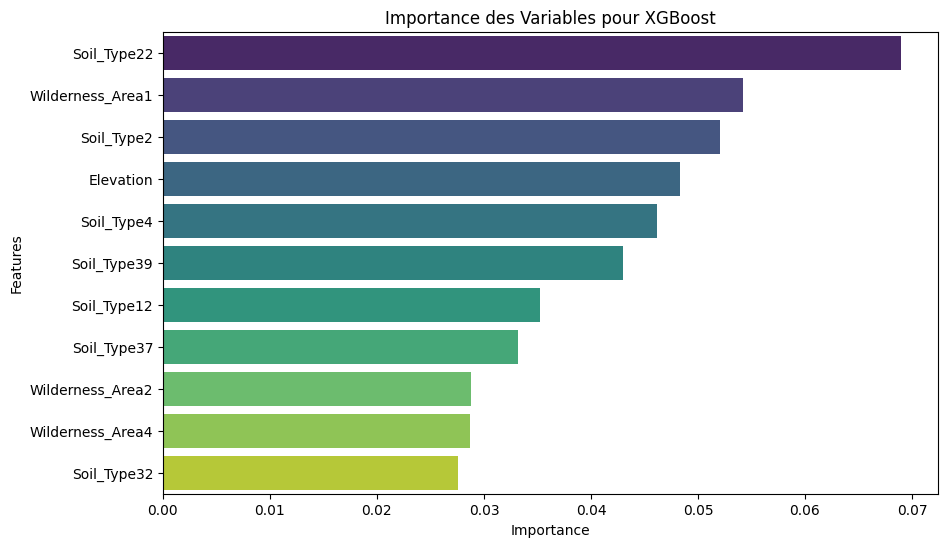

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Données
data = {
    'Feature': [
        'Soil_Type22', 'Wilderness_Area1', 'Soil_Type2', 'Elevation', 
        'Soil_Type4', 'Soil_Type39', 'Soil_Type12', 'Soil_Type37', 
        'Wilderness_Area2', 'Wilderness_Area4', 'Soil_Type32'
    ],
    'Importance': [
        0.068973, 0.054255, 0.052060, 0.048328, 0.046209, 
        0.042972, 0.035256, 0.033222, 0.028794, 0.028701, 0.027537
    ]
}

# Création du DataFrame
df_importance = pd.DataFrame(data)

# Trier les données par importance décroissante
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Création du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Importance des Variables pour XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")

plt.show()


In [80]:
importances = rf.feature_importances_
feature_names = X_train.columns  
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Trier et afficher les plus importantes
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("Importance des variables pour random forest:")
print(feature_importance_df.head(31))
print(feature_importance_df.tail(31))

Importance des variables pour random forest:
                                            Feature  Importance
55                           Elevation_Standardized    0.113321
0                                         Elevation    0.107945
54                               Elevation_Relative    0.095552
56     Horizontal_Distance_To_Roadways_Standardized    0.057432
5                   Horizontal_Distance_To_Roadways    0.055639
57  Horizontal_Distance_To_Fire_Points_Standardized    0.052354
9                Horizontal_Distance_To_Fire_Points    0.052033
62               Horizontal_Distance_To_Hydrology_2    0.031162
3                  Horizontal_Distance_To_Hydrology    0.031066
59                                       Aspect_cos    0.029879
4                    Vertical_Distance_To_Hydrology    0.029331
63                 Vertical_Distance_To_Hydrology_2    0.028106
7                                    Hillshade_Noon    0.026734
1                                            Aspect    0.02

/tmp/ipykernel_2972/3552596323.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance_rf, x='Importance', y='Feature', palette='viridis')


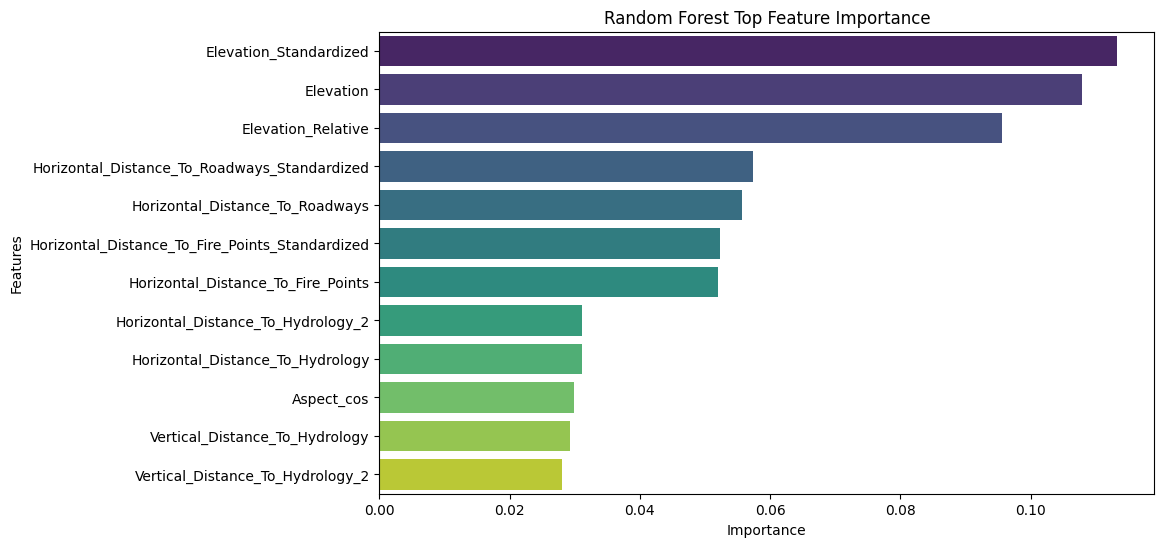

In [81]:
# Données
data_rf = {
    'Feature': [
        'Elevation_Standardized', 'Elevation', 'Elevation_Relative', 
        'Horizontal_Distance_To_Roadways_Standardized', 'Horizontal_Distance_To_Roadways', 
        'Horizontal_Distance_To_Fire_Points_Standardized', 'Horizontal_Distance_To_Fire_Points', 
        'Horizontal_Distance_To_Hydrology_2', 'Horizontal_Distance_To_Hydrology', 
        'Aspect_cos', 'Vertical_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology_2'
    ],
    'Importance': [
        0.113321, 0.107945, 0.095552, 0.057432, 0.055639, 
        0.052354, 0.052033, 0.031162, 0.031066, 0.029879, 
        0.029331, 0.028106
    ]
}

# Création du DataFrame
df_importance_rf = pd.DataFrame(data_rf)

# Trier les données par importance décroissante
df_importance_rf = df_importance_rf.sort_values(by='Importance', ascending=False)

# Création du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importance_rf, x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest Top Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")

plt.show()

## Recherche d'hyper parametre

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1
# Espaces d'hyperparamètres pour chaque modèle
random_forest_params = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

xgboost_params = {
    'n_estimators': np.arange(100, 1000, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

bagging_params = {
    'n_estimators': np.arange(50, 200, 10),
    'max_samples': np.linspace(0.5, 1.0, 5),
    'max_features': np.linspace(0.5, 1.0, 5),
    'bootstrap': [True, False]
}

# Initialisation des modèles
random_forest = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Recherche aléatoire pour chaque modèle
random_forest_search = RandomizedSearchCV(random_forest, random_forest_params, n_iter=20, cv=5, random_state=42, scoring='f1_micro')
xgboost_search = RandomizedSearchCV(xgboost, xgboost_params, n_iter=20, cv=5, random_state=42, scoring='f1_micro')
bagging_search = RandomizedSearchCV(bagging, bagging_params, n_iter=20, cv=5, random_state=42, scoring='f1_micro')

# Entraînement des recherches
print("Recherche aléatoire pour Random Forest...")
random_forest_search.fit(X_train, y_train_adjusted)
print("Meilleurs paramètres pour Random Forest:", random_forest_search.best_params_)
print("Score de validation croisée:", random_forest_search.best_score_)

print("\nRecherche aléatoire pour XGBoost...")
xgboost_search.fit(X_train, y_train_adjusted)
print("Meilleurs paramètres pour XGBoost:", xgboost_search.best_params_)
print("Score de validation croisée:", xgboost_search.best_score_)

print("\nRecherche aléatoire pour Bagging...")
bagging_search.fit(X_train, y_train_adjusted)
print("Meilleurs paramètres pour Bagging:", bagging_search.best_params_)
print("Score de validation croisée:", bagging_search.best_score_)


## hyper_parametre et deuxieme dataframe (df_change_2)

In [18]:
X = df_change_2.drop('Cover_Type', axis=1)  # Variables explicatives
y = df_change_2['Cover_Type']  # Variable cible (Cover_Type avec 7 classes)

# Division avec stratification pour préserver les proportions des 7 classes dans train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Elevation_Relative,Elevation_Standardized,Horizontal_Distance_To_Roadways_Standardized,Horizontal_Distance_To_Fire_Points_Standardized,Aspect_sin,Aspect_cos,Slope_sin,Slope_cos,Horizontal_Distance_To_Hydrology_2,Vertical_Distance_To_Hydrology_2
0,2909,28,18,182,58,1350,210,197,117,2160,...,-50.21515,-0.178808,-0.641052,0.138546,0.469472,0.882948,0.309017,0.951057,33124,3364
1,2757,334,30,212,83,1384,137,184,177,1570,...,-202.21515,-0.720055,-0.619264,-0.306762,-0.438371,0.898794,0.500000,0.866025,44944,6889
2,3283,248,4,150,15,5601,211,243,170,892,...,323.78485,1.152945,2.083076,-0.818489,-0.927184,-0.374607,0.069756,0.997564,22500,225
3,3019,330,14,541,-101,1811,186,222,175,2154,...,59.78485,0.212884,-0.345634,0.134018,-0.500000,0.866025,0.241922,0.970296,292681,10201
4,3039,340,20,474,74,3407,175,207,169,1879,...,79.78485,0.284101,0.677116,-0.073541,-0.342020,0.939693,0.342020,0.939693,224676,5476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2521,187,17,30,1,1099,220,250,158,1565,...,-438.21515,-1.560413,-0.801898,-0.310536,-0.121869,-0.992546,0.292372,0.956305,900,1
99996,2891,341,16,30,9,3774,186,215,167,2718,...,-68.21515,-0.242903,0.912297,0.559702,-0.325568,0.945519,0.275637,0.961262,900,81
99997,2563,129,9,134,18,569,236,235,129,1293,...,-396.21515,-1.410858,-1.141533,-0.515830,0.777146,-0.629320,0.156434,0.987688,17956,324
99998,3322,238,14,153,32,2773,195,251,192,841,...,362.78485,1.291818,0.270836,-0.856982,-0.848048,-0.529919,0.241922,0.970296,23409,1024


In [26]:
# Décaler les labels pour qu'ils commencent à 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialisation du modèle XGBoost
xgboost = xgb.XGBClassifier(n_estimators=1000, random_state=42)

# Entraînement du modèle
xgboost.fit(X_train, y_train_adjusted)

# Prédiction
y_pred_xgboost_test = xgboost.predict(X_test)
y_pred_xgboost_train = xgboost.predict(X_train)

# Évaluation
print("XGBoost - Classification Report(test):")
print(classification_report(y_test_adjusted, y_pred_xgboost_test))

print("XGBoost - Classification Report(train):")
print(classification_report(y_train_adjusted, y_pred_xgboost_train))

XGBoost - Classification Report(test):
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7282
           1       0.92      0.94      0.93      9735
           2       0.91      0.92      0.92      1255
           3       0.89      0.82      0.85        94
           4       0.86      0.69      0.76       327
           5       0.88      0.81      0.84       593
           6       0.95      0.92      0.94       714

    accuracy                           0.92     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.92      0.92      0.92     20000

XGBoost - Classification Report(train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29128
           1       1.00      1.00      1.00     38941
           2       1.00      1.00      1.00      5018
           3       1.00      1.00      1.00       377
           4       1.00      1.00      1.00      1308

In [44]:
model = xgb.XGBClassifier(n_estimators=1000, random_state=42)



scores_default = cross_val_score(model, X_train, y_train_adjusted, cv=5, scoring='accuracy')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.91125  0.908625 0.91075  0.912875 0.912375]
Score moyen: 0.9111750000000001


In [19]:
xgboost = xgb.XGBClassifier(
    subsample=0.9,
    n_estimators=500,
    max_depth=8,
    learning_rate=0.2677777777777778,
    colsample_bytree=0.7,
    random_state=42,
    
)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1
xgboost.fit(X_train, y_train_adjusted)

# Prédiction
y_pred_xgboost_test = xgboost.predict(X_test)
y_pred_xgboost_train = xgboost.predict(X_train)
# Ajuster les prédictions en fonction des labels originaux

# Évaluation
print("XGBoost - Classification Report(test):")
print(classification_report(y_test_adjusted, y_pred_xgboost_test))

print("XGBoost - Classification Report(train):")
print(classification_report(y_train_adjusted, y_pred_xgboost_train))

XGBoost - Classification Report(test):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7282
           1       0.93      0.95      0.94      9735
           2       0.91      0.93      0.92      1255
           3       0.89      0.85      0.87        94
           4       0.86      0.72      0.78       327
           5       0.88      0.82      0.85       593
           6       0.95      0.91      0.93       714

    accuracy                           0.93     20000
   macro avg       0.91      0.87      0.89     20000
weighted avg       0.93      0.93      0.93     20000

XGBoost - Classification Report(train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29128
           1       1.00      1.00      1.00     38941
           2       1.00      1.00      1.00      5018
           3       1.00      1.00      1.00       377
           4       1.00      1.00      1.00      1308

In [31]:
importances = xgboost.feature_importances_
feature_names = X_train.columns  
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Trier et afficher les plus importantes
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("Importance des variables pour xgboost :")
print(feature_importance_df.head(33))
print(feature_importance_df.tail(33))

Importance des variables pour xgboost :
                   Feature  Importance
50             Soil_Type37    0.120576
15              Soil_Type2    0.050946
35             Soil_Type22    0.043667
52             Soil_Type39    0.040469
10        Wilderness_Area1    0.037186
17              Soil_Type4    0.034462
0                Elevation    0.032545
25             Soil_Type12    0.032157
55  Elevation_Standardized    0.030098
48             Soil_Type35    0.025058
51             Soil_Type38    0.019799
16              Soil_Type3    0.019400
22              Soil_Type9    0.019059
11        Wilderness_Area2    0.018257
64    Affleurement_rocheux    0.017639
65        Famille_Leighcan    0.017289
45             Soil_Type32    0.017171
27             Soil_Type14    0.017064
13        Wilderness_Area4    0.016715
38             Soil_Type25    0.016568
12        Wilderness_Area3    0.015970
54      Elevation_Relative    0.015477
44             Soil_Type31    0.014967
34             Soil_Type

In [21]:
model = xgb.XGBClassifier(
    subsample=0.9,
    n_estimators=500,
    max_depth=8,
    learning_rate=0.2677777777777778,
    colsample_bytree=0.7,
    random_state=42,
    
)

# Validation croisée avec les paramètres par défaut
scores_default = cross_val_score(model, X_train, y_train_adjusted, cv=5, scoring='f1_weighted')
print("\nValidation croisée avec les paramètres par défaut:")
print(f"Scores: {scores_default}")
print(f"Score moyen: {scores_default.mean()}")


Validation croisée avec les paramètres par défaut:
Scores: [0.91584617 0.91607753 0.91549758 0.91670695 0.91618478]
Score moyen: 0.9160626014236859


In [20]:
test_features = df_test_change_2.drop(columns=['row_ID'])
Y_pred = xgboost.predict(test_features) 
Y_pred += 1

In [22]:
test_id = test['row_ID']
submission = pd.DataFrame({
    'row_ID': test_id,
    'Y_pred': Y_pred
})

submission.to_csv('submission_xgboost_VAplus_hyperparametre.csv', index=False)

In [122]:
X = df_change_xg  # Variables explicatives
y = df_change_xg['Cover_Type']  # Variable cible (Cover_Type avec 7 classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [125]:
y_train = X_train["Cover_Type"]
X_train = X_train.drop(columns = "Cover_Type")

In [126]:
X_test = X_test.drop(columns='Cover_Type', axis= 1)

In [127]:
xgboost = xgb.XGBClassifier(
    subsample=0.9,
    n_estimators=500,
    max_depth=8,
    learning_rate=0.2677777777777778,
    colsample_bytree=0.7,
    random_state=42,
    
)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1
xgboost.fit(X_train, y_train_adjusted)

# Prédiction
y_pred_xgboost_test = xgboost.predict(X_test)
y_pred_xgboost_train = xgboost.predict(X_train)
# Ajuster les prédictions en fonction des labels originaux

# Évaluation
print("XGBoost - Classification Report(test):")
print(classification_report(y_test_adjusted, y_pred_xgboost_test))

print("XGBoost - Classification Report(train):")
print(classification_report(y_train_adjusted, y_pred_xgboost_train))

XGBoost - Classification Report(test):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7282
           1       0.93      0.95      0.94      9735
           2       0.92      0.93      0.92      1255
           3       0.90      0.88      0.89        94
           4       0.84      0.77      0.81       327
           5       0.87      0.85      0.86       593
           6       0.94      0.92      0.93       714

    accuracy                           0.93     20000
   macro avg       0.90      0.89      0.90     20000
weighted avg       0.93      0.93      0.93     20000

XGBoost - Classification Report(train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29128
           1       1.00      1.00      1.00     38941
           2       1.00      1.00      1.00      6745
           3       1.00      1.00      1.00     10491
           4       1.00      1.00      1.00     10491

In [128]:
test_features = test.drop(columns=['row_ID'])
Y_pred = xgboost.predict(test_features) 
Y_pred += 1

In [129]:
test_id = test['row_ID']
submission = pd.DataFrame({
    'row_ID': test_id,
    'Y_pred': Y_pred
})

# Enregistrer le DataFrame dans un fichier CSV
submission.to_csv('submission_xgboost_VA_soil_oversampling_2.csv', index=False)

## oversampling

In [60]:
X = df_change_2 
y = df_change_2['Cover_Type']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [73]:
#over fitting 
from imblearn.over_sampling import SMOTE
import pandas as pd

# Sélectionnez uniquement les données des classes 3, 7, 5, 4 et 6
df_class5_6 = train[train['Cover_Type'].isin([3, 7, 5, 4, 6])]

# Sélectionnez les caractéristiques sans la variable cible 'Cover_Type'
X_class5_6 = df_class5_6.drop(columns=['Cover_Type']) #0.225375440745619

# Sélectionnez les étiquettes
y_class5_6 = df_class5_6['Cover_Type']

# Définir le nombre d'échantillons cible pour chaque classe avec des coefficients différents
target_samples_0_6 = int( 0.2* train[train['Cover_Type'] == 1].shape[0])  
target_samples_0_8 = int( 0.27* train[train['Cover_Type'] == 2].shape[0])  

sampling_strategy = {
    3: target_samples_0_8,
    6: target_samples_0_8,
    7: target_samples_0_8,
    4: target_samples_0_6,
    5: target_samples_0_6
}

# Appliquer SMOTE pour générer des échantillons synthétiques
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_class5_6_resampled, y_class5_6_resampled = smote.fit_resample(X_class5_6, y_class5_6)

df_class5_6_resampled = pd.DataFrame(X_class5_6_resampled, columns=X_class5_6.columns)
df_class5_6_resampled['Cover_Type'] = y_class5_6_resampled

df_oversampled = pd.concat([train[~train['Cover_Type'].isin([3, 7, 5, 4, 6])], df_class5_6_resampled])

print(df_oversampled['Cover_Type'].value_counts())

Cover_Type
2    48676
1    36410
7    13142
3    13142
6    13142
4     7282
5     7282
Name: count, dtype: int64


/tmp/ipykernel_2972/2215086932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_data.index, y=count_data.values, palette="viridis")


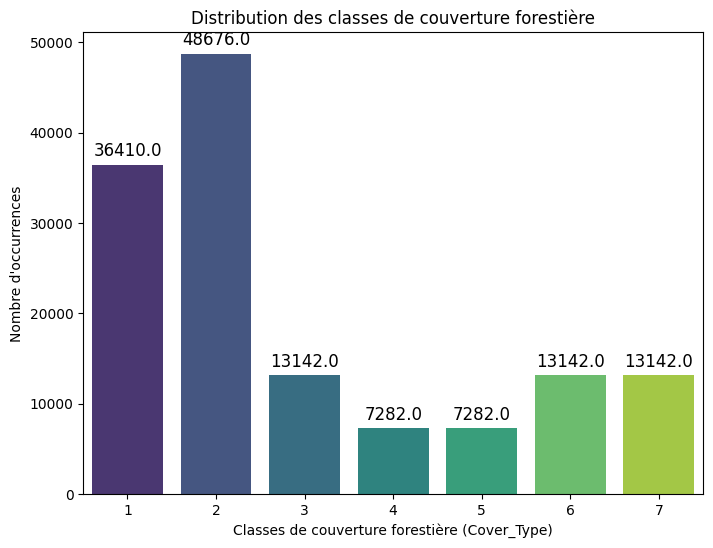

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter les occurrences de chaque catégorie
count_data = df_oversampled['Cover_Type'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=count_data.index, y=count_data.values, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.xlabel("Classes de couverture forestière (Cover_Type)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des classes de couverture forestière")

plt.show()


In [62]:
X_train = df_oversampled

In [48]:
X_train

,Elevation,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,...,Elevation_Standardized,Horizontal_Distance_To_Roadways_Standardized,Horizontal_Distance_To_Fire_Points_Standardized,Aspect_cos,Horizontal_Distance_To_Hydrology_2,Affleurement_rocheux,Famille_Leighcan,Pierreux_Caillouteux,Complexes_Cry,Sols_hydriques_humides
64173,3246,30,1617,234,209,721,1,0,0,0,...,1.021194,-0.469953,-0.947553,0.390731,900,0,0,1,0,0
19330,2823,210,1450,244,219,1719,0,0,1,0,...,-0.485040,-0.576970,-0.194303,-0.829038,44100,1,0,0,0,0
53779,3290,60,6071,149,239,589,1,0,0,0,...,1.177871,2.384262,-1.047181,0.034899,3600,0,0,1,0,0
25628,2960,134,1900,220,236,153,0,0,1,0,...,0.002795,-0.288601,-1.376256,0.190809,17956,1,0,1,0,0
72395,2635,277,513,222,212,1816,1,0,0,0,...,-1.154477,-1.177419,-0.121091,0.731354,76729,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41212,3327,108,3781,203,246,1748,0,0,0,0,...,1.311710,0.917169,-0.171776,-0.661883,11664,0,0,1,0,0
41213,3344,0,2260,215,214,1144,0,0,1,0,...,1.371992,-0.057591,-0.628088,0.556593,0,0,0,1,1,0
41214,3345,458,1348,227,219,1099,0,0,1,0,...,1.375956,-0.642287,-0.661828,0.339808,210164,0,0,0,0,0
41215,3285,212,4228,235,197,2648,0,0,0,0,...,1.160469,1.203446,0.507570,0.366848,44944,0,0,0,0,0


In [63]:
y_train = X_train['Cover_Type']

In [64]:
X_train = X_train.drop('Cover_Type', axis=1) 
X_test = X_test.drop('Cover_Type', axis=1)  

In [65]:
xgboost = xgb.XGBClassifier(
    subsample=0.9,
    n_estimators=500,
    max_depth=8,
    learning_rate=0.2677777777777778,
    colsample_bytree=0.7,
    random_state=42,
    
)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1
xgboost.fit(X_train, y_train_adjusted)

y_pred_xgboost_test = xgboost.predict(X_test)
y_pred_xgboost_train = xgboost.predict(X_train)

print("XGBoost - Classification Report(test):")
print(classification_report(y_test_adjusted, y_pred_xgboost_test))

print("XGBoost - Classification Report(train):")
print(classification_report(y_train_adjusted, y_pred_xgboost_train))

XGBoost - Classification Report(test):
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7282
           1       0.93      0.95      0.94      9735
           2       0.93      0.92      0.92      1255
           3       0.87      0.88      0.88        94
           4       0.84      0.77      0.80       327
           5       0.88      0.88      0.88       593
           6       0.95      0.92      0.94       714

    accuracy                           0.93     20000
   macro avg       0.90      0.89      0.90     20000
weighted avg       0.93      0.93      0.93     20000

XGBoost - Classification Report(train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29128
           1       1.00      1.00      1.00     38941
           2       1.00      1.00      1.00      6745
           3       1.00      1.00      1.00      6745
           4       1.00      1.00      1.00     14385

In [66]:
test_features = df_test_change_2.drop(columns=['row_ID'])
Y_pred = xgboost.predict(test_features) 
Y_pred += 1

In [67]:
test_id = test['row_ID']
submission = pd.DataFrame({
    'row_ID': test_id,
    'Y_pred': Y_pred
})

submission.to_csv('submission_xgboost_VAplus_hyperparametre_oversampling_222.csv', index=False)